In [125]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [9]:
whale_returns_data = Path("../PANDAS/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [11]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [12]:
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [13]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [15]:
algo_returns_data = Path("../PANDAS/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [16]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
algo_df = algo_returns.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [20]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [19]:
algo_df
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [21]:
sp500_history_data = Path("../PANDAS/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [22]:
sp500_history.isnull().sum()

Close    0
dtype: int64

In [23]:
sp500_df = sp500_history.dropna()
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [24]:
sp500_df.dtypes

Close    object
dtype: object

In [25]:
sp500_df['Close']=sp500_df['Close'].str.replace("$","")
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [26]:
sp500_df['Close']=sp500_df['Close'].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [27]:
daily_return = sp500_df.pct_change()
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [32]:
#looking for nulls and dropping!
daily_return.dropna(inplace=True)
daily_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [33]:
sp500_return = daily_return
sp500_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [36]:
sp500_return = sp500_return.rename(columns={'Close':"sp500_close"})
sp500_return.head()

,sp500_close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


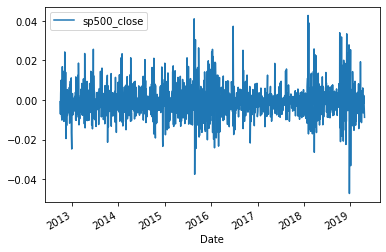

In [41]:
# sp500_return
# Visualize daily_return plot
sp500_return.plot();

In [42]:
combine_df=pd.concat([whale_returns,algo_df,sp500_return], axis='columns',join='inner')

combine_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [45]:
combine_df.sort_index(inplace=True)
combine_df.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378


In [40]:
# combine_df=pd.DataFrame(combine_df)

In [49]:
combine_df.dropna(inplace=True)


In [51]:
combine_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500_close                    0
dtype: int64

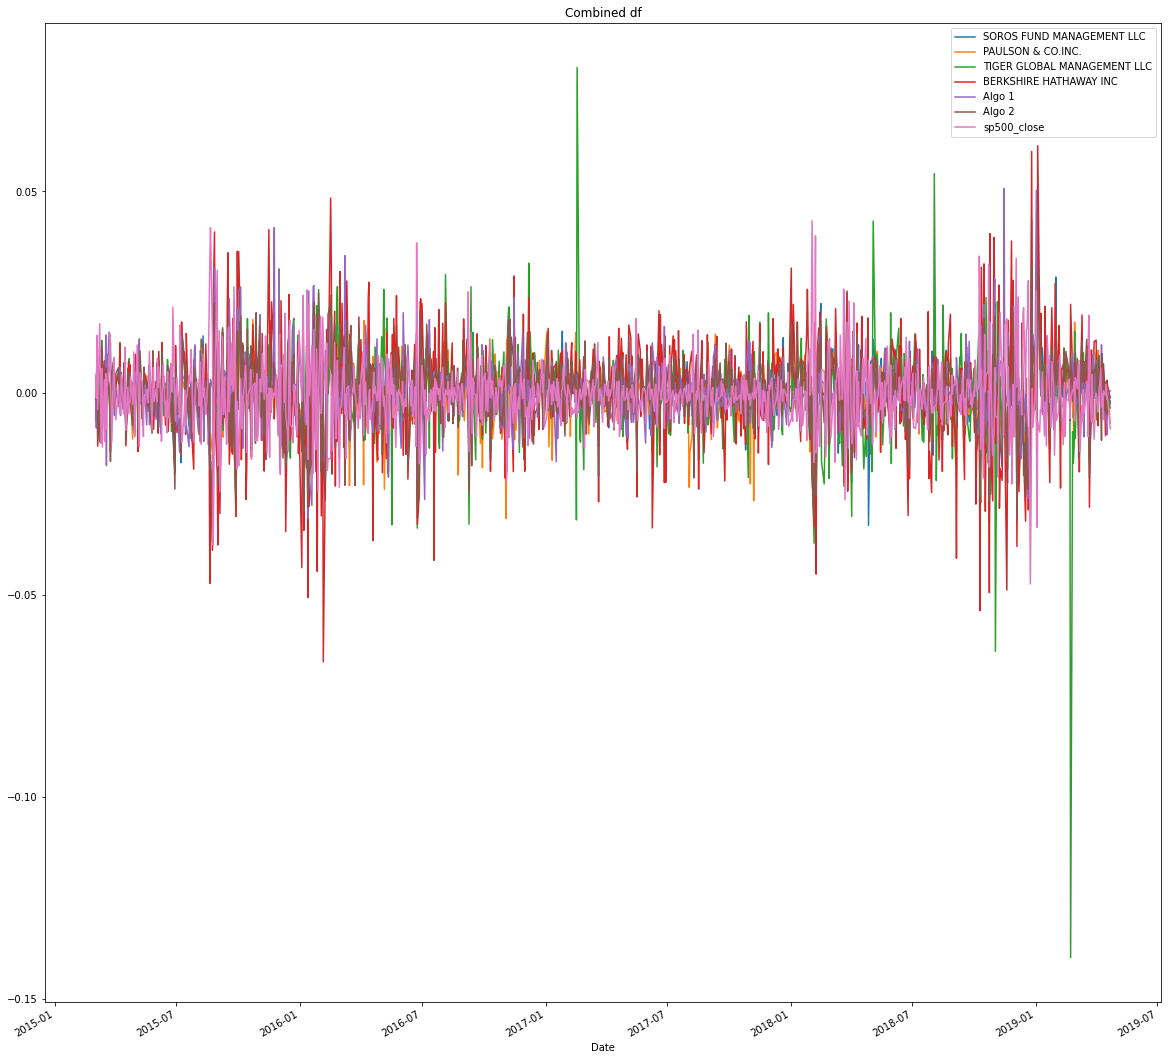

In [56]:
combine_df.plot(figsize=(20,20), title='Combined df');


In [53]:
# combine_df.isnull()

In [57]:
cummulative_returns = (1+combine_df).cumprod()

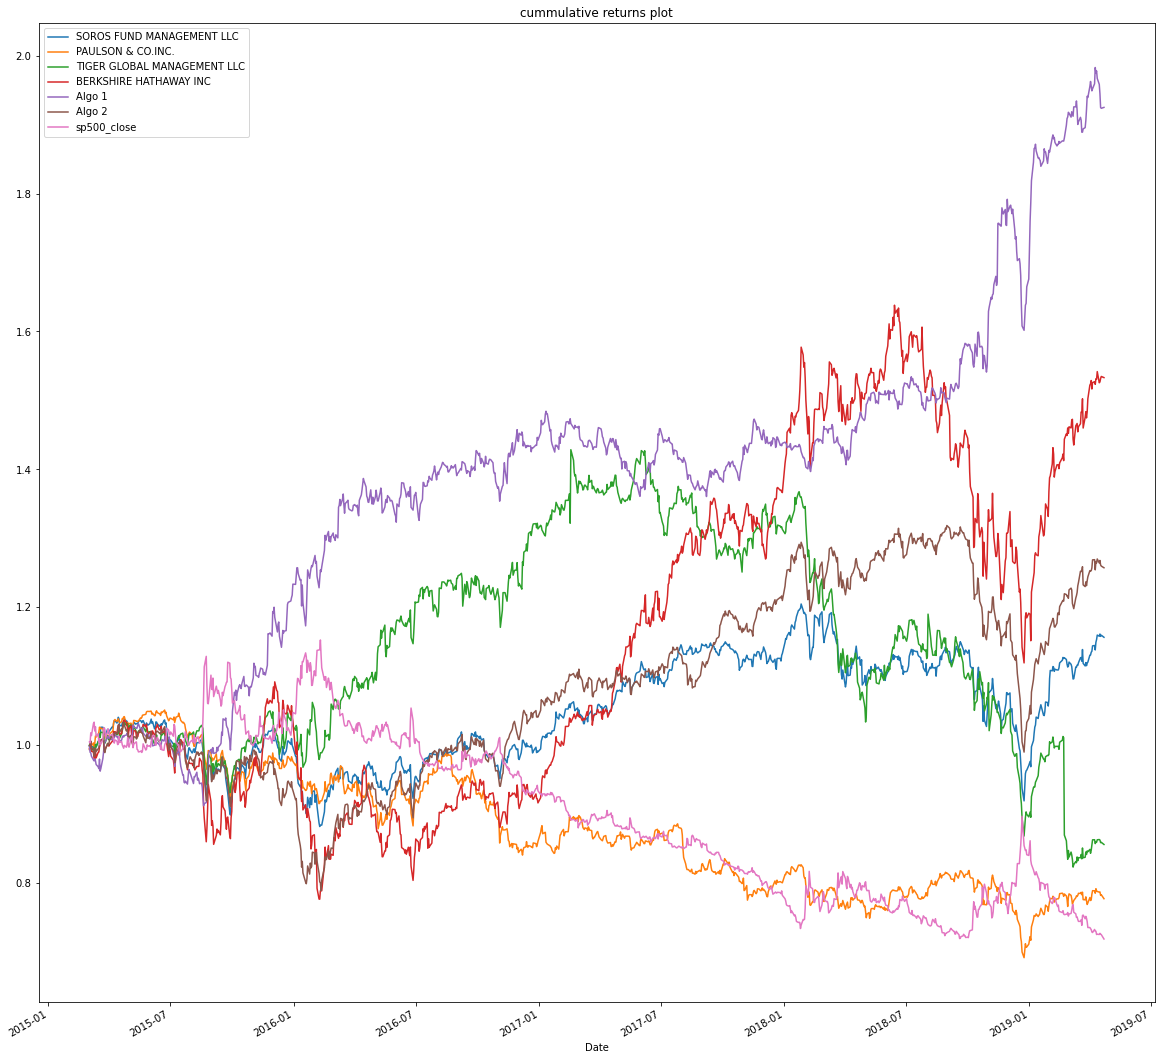

In [59]:
cummulative_returns.plot(figsize=(20,20), title='cummulative returns plot') ;

In [61]:
cummulative_returns.tail(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_close
Date,,,,,,,
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,0.724829
2019-04-22,1.156280,0.776939,0.855652,1.533046,1.925124,1.257151,0.718476


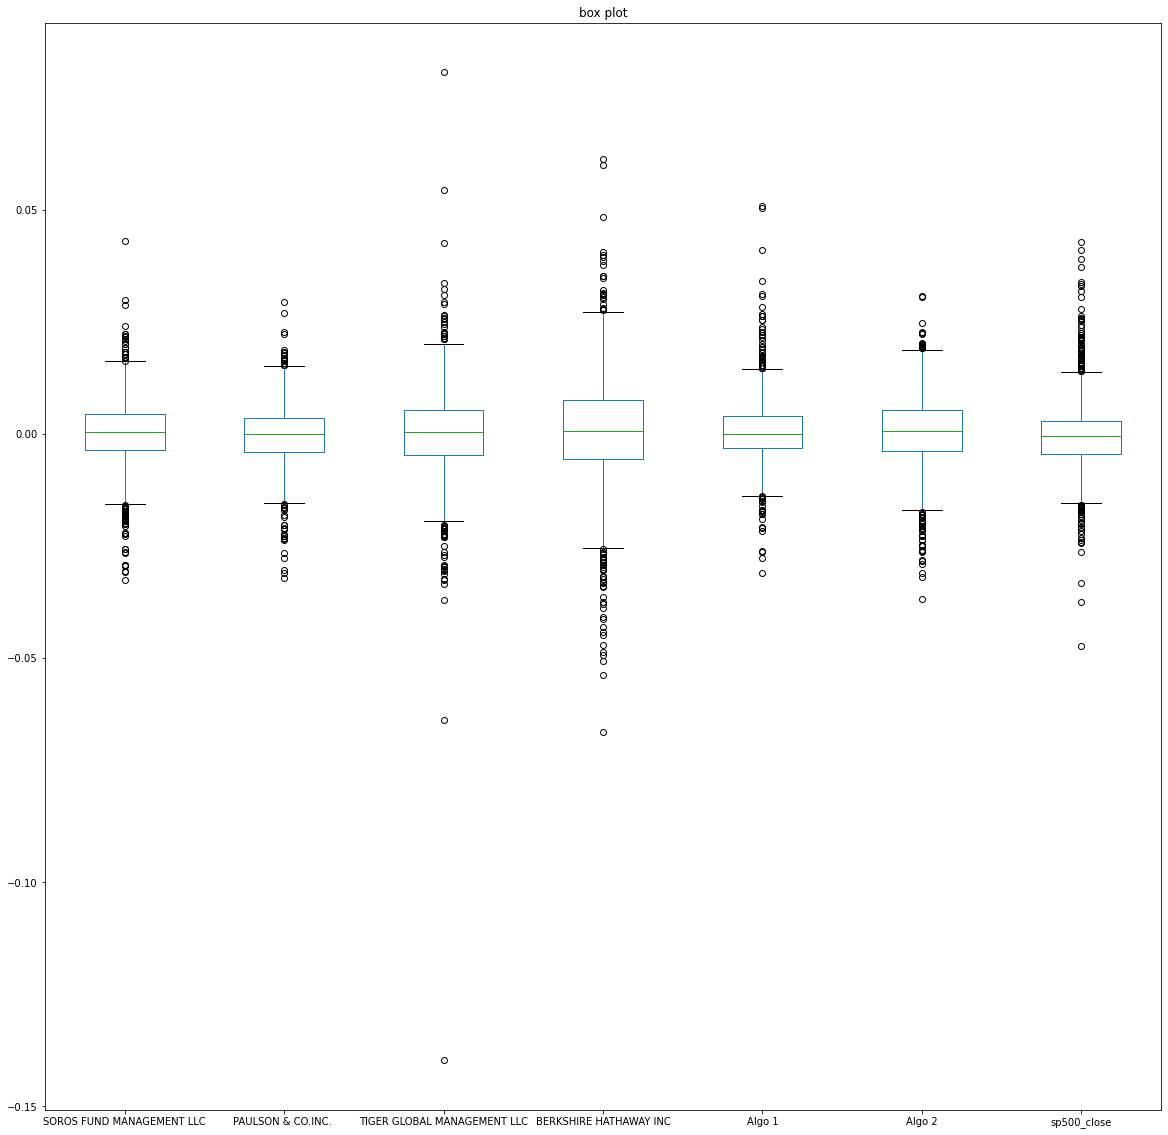

In [64]:
combine_df.plot.box(figsize=(20,20), title = 'box plot') ;

In [260]:
combine_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500_close                    0.008587
dtype: float64

In [261]:
#sorting the std
combine_std.sort_values(ascending=True)


PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
sp500_close                    0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [267]:
combined_df.corr()

,gogle,aapl,Close
gogle,1.000000,0.898473,0.706301
aapl,0.898473,1.000000,0.870708
Close,0.706301,0.870708,1.000000


In [72]:
# daily STD for sp500 is 0.008587
# The portfolio that has more risk than sp500 is BERKSHIRE HATHAWAY INC. because of its more volatile.       

In [264]:
# Annualized std for 252 trading days

combine_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
sp500_close                    0.136313
dtype: float64

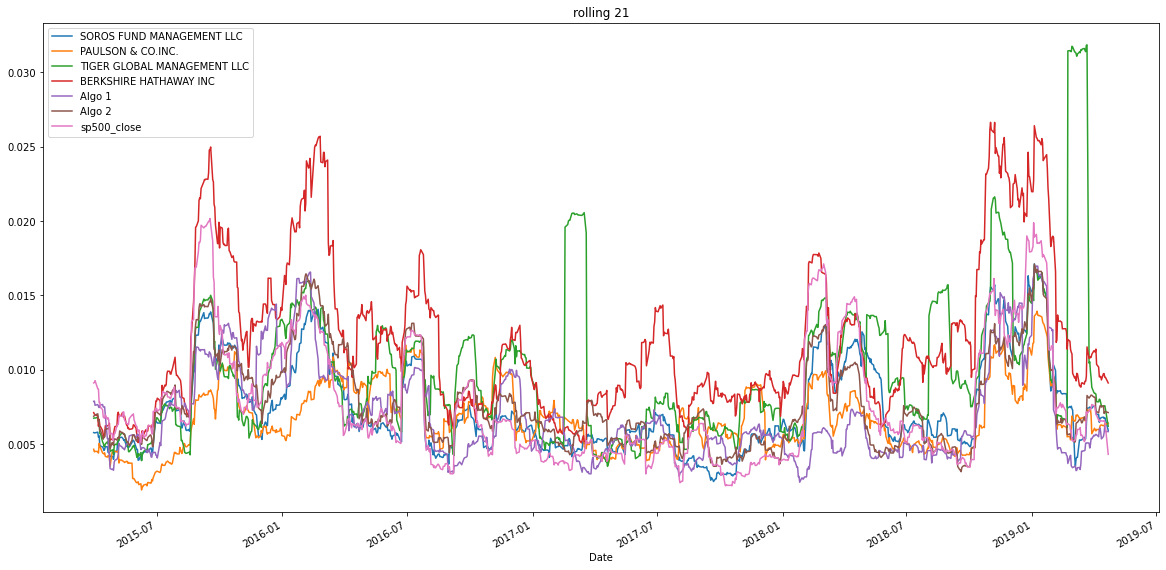

In [269]:
#sp500 rolling statistics

combine_df.rolling(window=21).std().plot(figsize=(20,10), title='rolling 21') ;

In [118]:
sp500_std = sp500_return.std()

sp500_std

sp500_close    0.008135
dtype: float64

In [119]:
combine_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500_close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


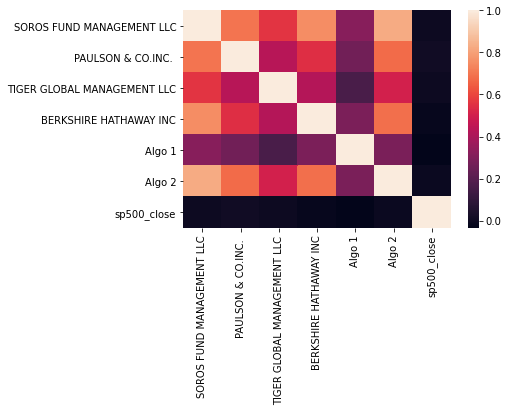

In [270]:
sns.heatmap(combine_df.corr());

In [272]:
cova = combine_df['Algo 1'].rolling(window=60).cov(combine_df['sp500_close'])
var =  combine_df['sp500_close'].var()

In [273]:
beta = cova / sp500_var

beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.065152
2019-04-16   -0.051852
2019-04-17   -0.051402
2019-04-18   -0.051983
2019-04-22   -0.057386
Length: 1042, dtype: float64

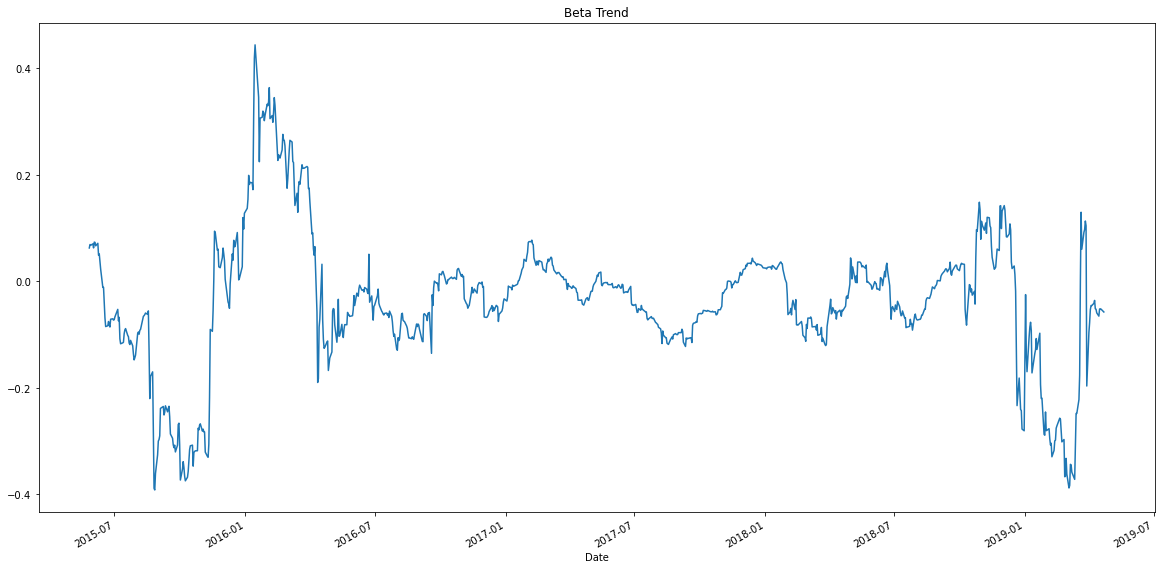

In [275]:
beta.plot(figsize=(20,10), title='Beta Trend');

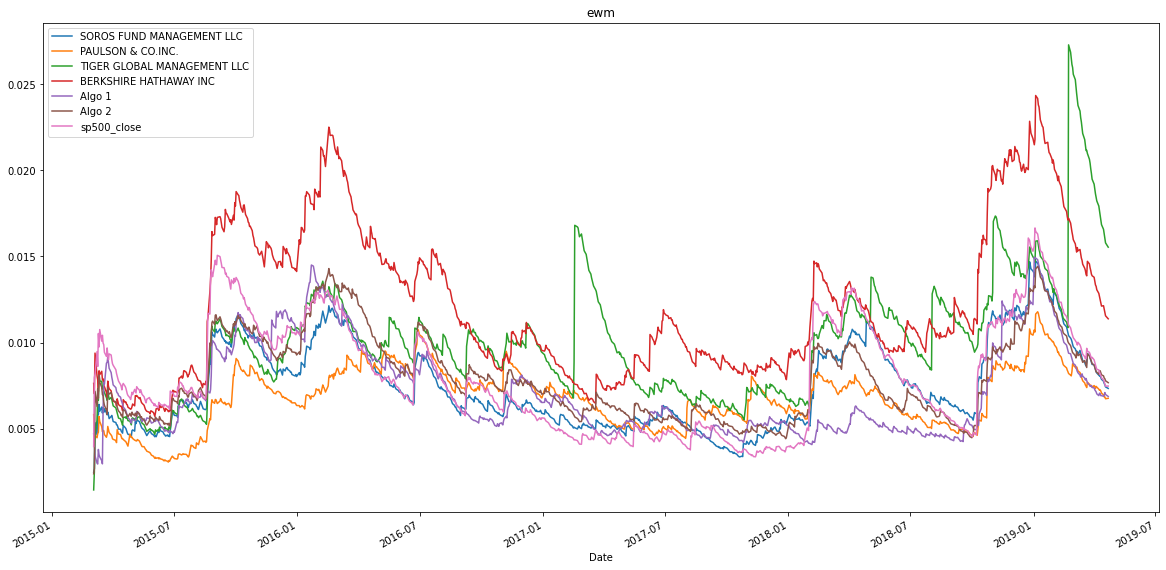

In [277]:
combine_df.ewm(halflife=21).std().plot(figsize=(20,10), title="ewm");

In [279]:
sharpe_ratio = (combine_df.mean()*252)/(combine_df.std() * np.sqrt(252))

sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500_close                   -0.518582
dtype: float64

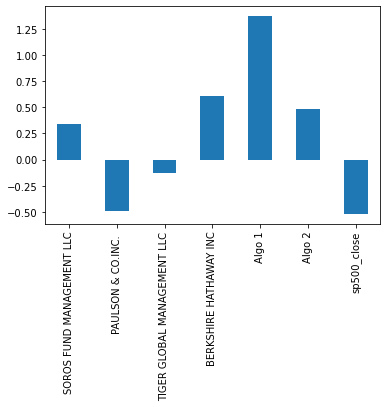

In [280]:
sharpe_ratio.plot.bar();

In [345]:
gogle_2019_data = Path("../PANDAS/GOGLE_2019 - Sheet1.csv")
gogle_2019 = pd.read_csv('GOGLE_2019 - Sheet1.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
gogle_2019.head()

,Close
Date,
2019-01-02 16:00:00,1045.85
2019-01-03 16:00:00,1016.06
2019-01-04 16:00:00,1070.71
2019-01-07 16:00:00,1068.39
2019-01-08 16:00:00,1076.28


In [347]:
#changing the date index
gogle_2019.index = pd.to_datetime(gogle_2019.index, format='%Y-%m-%d %h:%m:%s').strftime('%Y-%m-%d')

In [348]:
gogle_2019.head()

,Close
Date,
2019-01-02,1045.85
2019-01-03,1016.06
2019-01-04,1070.71
2019-01-07,1068.39
2019-01-08,1076.28


In [373]:
gogle_2019 = gogle_2019.rename(columns={'Close':"gogle"})
gogle_2019.head()

,gogle
Date,
2019-01-02,1045.85
2019-01-03,1016.06
2019-01-04,1070.71
2019-01-07,1068.39
2019-01-08,1076.28


In [369]:
#changing the index from object to datetime

gogle_2019.index = pd.to_datetime(gogle_2019.index)

In [370]:
gogle_2019.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [359]:
combine_df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-22'],
              dtype='datetime64[ns]', name='Date', length=1042, freq=None)

In [371]:
aapl_2019 = pd.read_csv('AAPL_2019 - Sheet1.csv',index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_2019.index = pd.to_datetime(aapl_2019.index, format='%Y-%m-%d %h:%m:%s').strftime('%Y-%m-%d')
aapl_2019.index = pd.to_datetime(aapl_2019.index)
aapl_2019.head()


,Close
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69


In [372]:
aapl_2019 = aapl_2019.rename(columns={'Close':"aapl"})

aapl_2019.head()


,aapl
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69


In [374]:
cost_2019 = pd.read_csv('COST_2019 - Sheet1.csv',index_col="Date", parse_dates=True, infer_datetime_format=True)
cost_2019.index = pd.to_datetime(cost_2019.index, format='%Y-%m-%d %h:%m:%s').strftime('%Y-%m-%d')
cost_2019.index = pd.to_datetime(cost_2019.index)
cost_2019.head()

,Close
Date,
2019-01-02,204.76
2019-01-03,200.42
2019-01-04,206.24
2019-01-07,207.00
2019-01-08,208.55


In [375]:
cost_2019 = cost_2019.rename(columns={'Close':"cost"})

cost_2019.head()

,cost
Date,
2019-01-02,204.76
2019-01-03,200.42
2019-01-04,206.24
2019-01-07,207.00
2019-01-08,208.55


In [376]:
combined_df = pd.concat([gogle_2019,aapl_2019,cost_2019], axis='columns',join='inner')

combined_df.head()

,gogle,aapl,cost
Date,,,
2019-01-02,1045.85,39.48,204.76
2019-01-03,1016.06,35.55,200.42
2019-01-04,1070.71,37.07,206.24
2019-01-07,1068.39,36.98,207.00
2019-01-08,1076.28,37.69,208.55


In [377]:
#calculated returns and alsp dropping the NAs at the same time

combined_returns = combined_df.pct_change().dropna()

combined_returns.head()

,gogle,aapl,cost
Date,,,
2019-01-03,-0.028484,-0.099544,-0.021196
2019-01-04,0.053786,0.042757,0.029039
2019-01-07,-0.002167,-0.002428,0.003685
2019-01-08,0.007385,0.019200,0.007488
2019-01-09,-0.001505,0.016981,0.006473


In [378]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_weights_returns = combined_returns.dot(weights)

In [379]:
portfolio_weights_returns.head()

Date
2019-01-03   -0.049741
2019-01-04    0.041861
2019-01-07   -0.000303
2019-01-08    0.011357
2019-01-09    0.007316
dtype: float64

In [380]:
combined_df_port_returns = pd.concat([portfolio_weights_returns,combined_returns], axis='columns',join='inner')

combined_df_port_returns.head()

,0,gogle,aapl,cost
Date,,,,
2019-01-03,-0.049741,-0.028484,-0.099544,-0.021196
2019-01-04,0.041861,0.053786,0.042757,0.029039
2019-01-07,-0.000303,-0.002167,-0.002428,0.003685
2019-01-08,0.011357,0.007385,0.019200,0.007488
2019-01-09,0.007316,-0.001505,0.016981,0.006473


In [381]:
#renaming the 0 in the df to weight returns
combined_df_port_returns = combined_df_port_returns.rename(columns={0:"weight returns"})

combined_df_port_returns.head()

,weight returns,gogle,aapl,cost
Date,,,,
2019-01-03,-0.049741,-0.028484,-0.099544,-0.021196
2019-01-04,0.041861,0.053786,0.042757,0.029039
2019-01-07,-0.000303,-0.002167,-0.002428,0.003685
2019-01-08,0.011357,0.007385,0.019200,0.007488
2019-01-09,0.007316,-0.001505,0.016981,0.006473


In [382]:
# checking for NaNs

combined_df_port_returns.isnull().sum()

weight returns    0
gogle             0
aapl              0
cost              0
dtype: int64

In [383]:
comb_annualize_std = combined_df_port_returns.std() * np.sqrt(252)

comb_annualize_std.head()

weight returns    0.176642
gogle             0.242220
aapl              0.262744
cost              0.161247
dtype: float64

In [384]:
comb_annualize_std = comb_annualize_std.sort_values(ascending=True)

comb_annualize_std

cost              0.161247
weight returns    0.176642
gogle             0.242220
aapl              0.262744
dtype: float64

In [385]:
#correlation using returns data

combined_df_port_returns.corr()

,weight returns,gogle,aapl,cost
weight returns,1.000000,0.843191,0.851335,0.632608
gogle,0.843191,1.000000,0.557861,0.359913
aapl,0.851335,0.557861,1.000000,0.330400
cost,0.632608,0.359913,0.330400,1.000000


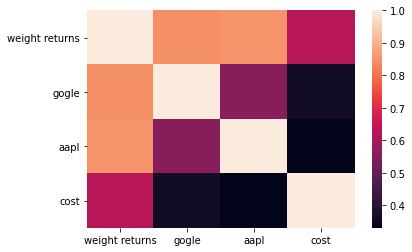

In [386]:
sns.heatmap(combined_df_port_returns.corr());

In [387]:
combined_df_port_returns.head()

,weight returns,gogle,aapl,cost
Date,,,,
2019-01-03,-0.049741,-0.028484,-0.099544,-0.021196
2019-01-04,0.041861,0.053786,0.042757,0.029039
2019-01-07,-0.000303,-0.002167,-0.002428,0.003685
2019-01-08,0.011357,0.007385,0.019200,0.007488
2019-01-09,0.007316,-0.001505,0.016981,0.006473


In [406]:
new_combined_porftolios

,weight returns,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,sp500_close
Date,,,,,,,,
2015-03-03,NaN,-0.001942,-0.000949,-0.006569,-0.004981,-0.001266,-0.000496,0.004408
2015-03-04,NaN,-0.008589,0.002416,0.004213,0.003241,0.002230,-0.002534,-0.001195
2015-03-05,NaN,-0.000955,0.004323,0.006726,0.004076,0.004016,0.002355,0.014378
2015-03-06,NaN,-0.004957,-0.011460,-0.013098,-0.003574,-0.007905,-0.008481,-0.003929
2015-03-09,NaN,-0.005447,0.001303,-0.001652,0.004225,0.000582,0.005843,0.017254
...,...,...,...,...,...,...,...,...
2019-12-23,-0.000556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,-0.003914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,0.012534,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
new_combined_porftolios = pd.concat([combine_df, combined_df_port_returns['gogle']])
new_combined_porftolios =  new_combined_porftolios.rename(columns={0:"weight returns"})

new_combined_porftolios.columns

Index(['weight returns', 'Algo 1', 'Algo 2', 'BERKSHIRE HATHAWAY INC',
       'PAULSON & CO.INC. ', 'SOROS FUND MANAGEMENT LLC',
       'TIGER GLOBAL MANAGEMENT LLC', 'sp500_close'],
      dtype='object')

In [410]:
cova_new = new_combined_porftolios['weight returns'].rolling(window=60).cov(new_combined_porftolios['sp500_close'])
var_new = new_combined_porftolios['sp500_close'].var()

In [411]:
beta_new = cova_new / var_new

In [418]:
new_combined_porftolios.dropna()s

,weight returns,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,sp500_close
Date,,,,,,,,


In [319]:
combined_df_port_returns['weight returns'].rolling(window=60).cov(sp500_return['sp500_close'])

Date
2012-10-01 00:00:00   NaN
2012-10-02 00:00:00   NaN
2012-10-03 00:00:00   NaN
2012-10-04 00:00:00   NaN
2012-10-05 00:00:00   NaN
                       ..
2019-12-23 16:00:00   NaN
2019-12-24 13:00:00   NaN
2019-12-26 16:00:00   NaN
2019-12-27 16:00:00   NaN
2019-12-30 16:00:00   NaN
Length: 1898, dtype: float64

In [397]:
new_combined_porftolios =  new_combined_porftolios.rename(columns={0:"weight returns"})

new_combined_porftolios

,weight returns,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,sp500_close
Date,,,,,,,,
2015-03-03,NaN,-0.001942,-0.000949,-0.006569,-0.004981,-0.001266,-0.000496,0.004408
2015-03-04,NaN,-0.008589,0.002416,0.004213,0.003241,0.002230,-0.002534,-0.001195
2015-03-05,NaN,-0.000955,0.004323,0.006726,0.004076,0.004016,0.002355,0.014378
2015-03-06,NaN,-0.004957,-0.011460,-0.013098,-0.003574,-0.007905,-0.008481,-0.003929
2015-03-09,NaN,-0.005447,0.001303,-0.001652,0.004225,0.000582,0.005843,0.017254
...,...,...,...,...,...,...,...,...
2019-12-23,-0.000556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,-0.003914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,0.012534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
